# Extraction of Collocated ESA CCI Biomass and Sentinel-2 NDVI

In [25]:
import os

# define repo name and get root working directory
repo = 'byoc-api'
root_path = os.getcwd()[ 0 : os.getcwd().find( repo ) + len ( repo )]
root_path

'C:\\Users\\crwil\\Documents\\GitHub\\sentinelhub\\byoc-api'

In [26]:
# get pathname to configuration file
cfg_file = os.path.join( os.path.join( root_path, 'cfg' ), 'fusion/s2-agb.yml' )
with open( cfg_file ) as f:
    print ( f.read() )

request:
    evalscript: |
                //VERSION=3
                function setup() {
                    return {
                        input: [{
                            datasource: "byoc",
                            bands: [ "agb", "agb_sd" ]
                        },
                        {
                            datasource: "s2_l2a",
                            bands: [ "B04", "B08", "SCL" ],
                        } ],
                        output: [
                            {id: "AGB", bands: 1, sampleType: SampleType.UINT16},
                            {id: "AGB_SD", bands: 1, sampleType: SampleType.UINT16},
                            {id: "NDVI", bands: 1, sampleType: SampleType.FLOAT32} 
                        ]
                    }
                }
                function evaluatePixel(samples) {                                  
                    
                    var byoc = samples.byoc[0]
                    var s2 = samples.s2_l2a[0]
  

In [27]:
import yaml
from munch import munchify

# load cfg file using yaml parser
with open( cfg_file, 'r' ) as f:
    config = munchify( yaml.safe_load( f ) )

### _Arbitrary location of a land parcel somewhere in southwest Kenya_

In [4]:
# setup aoi limits and resolution
coords = 34, -0.9, 35, 0.0
resolution = 100

In [5]:
# create instance of shclient class
from processapi import Client
client = Client( config )

In [6]:
# get utm bbox
bbox = client.getBoundingBox( coords )
print ( bbox, bbox.crs.value )

611267.0115533349,9900507.623553107,722595.4396756797,10000000.0 32736


In [7]:
# get aoi image dimensions
client.getBoxDimensions( bbox, resolution )

(1113, 995)

### _Define and extract biomass + S2 time-series for autumn 2018_

In [13]:
# pick a few dates
from datetime import datetime
timeframe = { 'start' : datetime( 2018, 9, 1, 0, 0, 0 ), 
                'end' : datetime( 2018, 11, 7, 23, 59, 59 ) }
timeframe

{'start': datetime.datetime(2018, 9, 1, 0, 0),
 'end': datetime.datetime(2018, 11, 7, 23, 59, 59)}

In [14]:
# get time series
response = client.getTimeSeries ( bbox, timeframe, resolution )
response._df

,AGB.tif,AGB_SD.tif,NDVI.tif,time
0,"[[12, 29, 30, 32, 32, 32, 33, 29, 27, 31, 32, ...","[[8, 18, 17, 17, 17, 17, 20, 19, 19, 25, 26, 2...","[[0.6844444, 0.70390606, 0.6876061, 0.6457896,...",2018-09-09 08:07:44+00:00
1,"[[12, 29, 30, 32, 32, 32, 33, 29, 27, 31, 32, ...","[[8, 18, 17, 17, 17, 17, 20, 19, 19, 25, 26, 2...","[[0.68340427, 0.7107438, 0.6835036, 0.64476883...",2018-09-14 08:01:59+00:00
2,"[[12, 29, 30, 32, 32, 32, 33, 29, 27, 31, 32, ...","[[8, 18, 17, 17, 17, 17, 20, 19, 19, 25, 26, 2...","[[0.6783029, 0.6833192, 0.6724337, 0.63219094,...",2018-09-19 08:04:34+00:00
3,"[[12, 29, 30, 32, 32, 32, 33, 29, 27, 31, 32, ...","[[8, 18, 17, 17, 17, 17, 20, 19, 19, 25, 26, 2...","[[0.692221, 0.71164095, 0.6834231, 0.6554054, ...",2018-09-24 08:02:13+00:00
4,"[[12, 29, 30, 32, 32, 32, 33, 29, 27, 31, 32, ...","[[8, 18, 17, 17, 17, 17, 20, 19, 19, 25, 26, 2...","[[0.65544873, 0.6764318, 0.64626235, 0.6246757...",2018-10-04 08:09:50+00:00
5,"[[12, 29, 30, 32, 32, 32, 33, 29, 27, 31, 32, ...","[[8, 18, 17, 17, 17, 17, 20, 19, 19, 25, 26, 2...","[[0.7119957, 0.7119862, 0.6928224, 0.656896, 0...",2018-10-09 08:03:37+00:00
6,"[[12, 29, 30, 32, 32, 32, 33, 29, 27, 31, 32, ...","[[8, 18, 17, 17, 17, 17, 20, 19, 19, 25, 26, 2...","[[-99.0, -99.0, -99.0, -99.0, -99.0, -99.0, -9...",2018-10-29 08:04:32+00:00


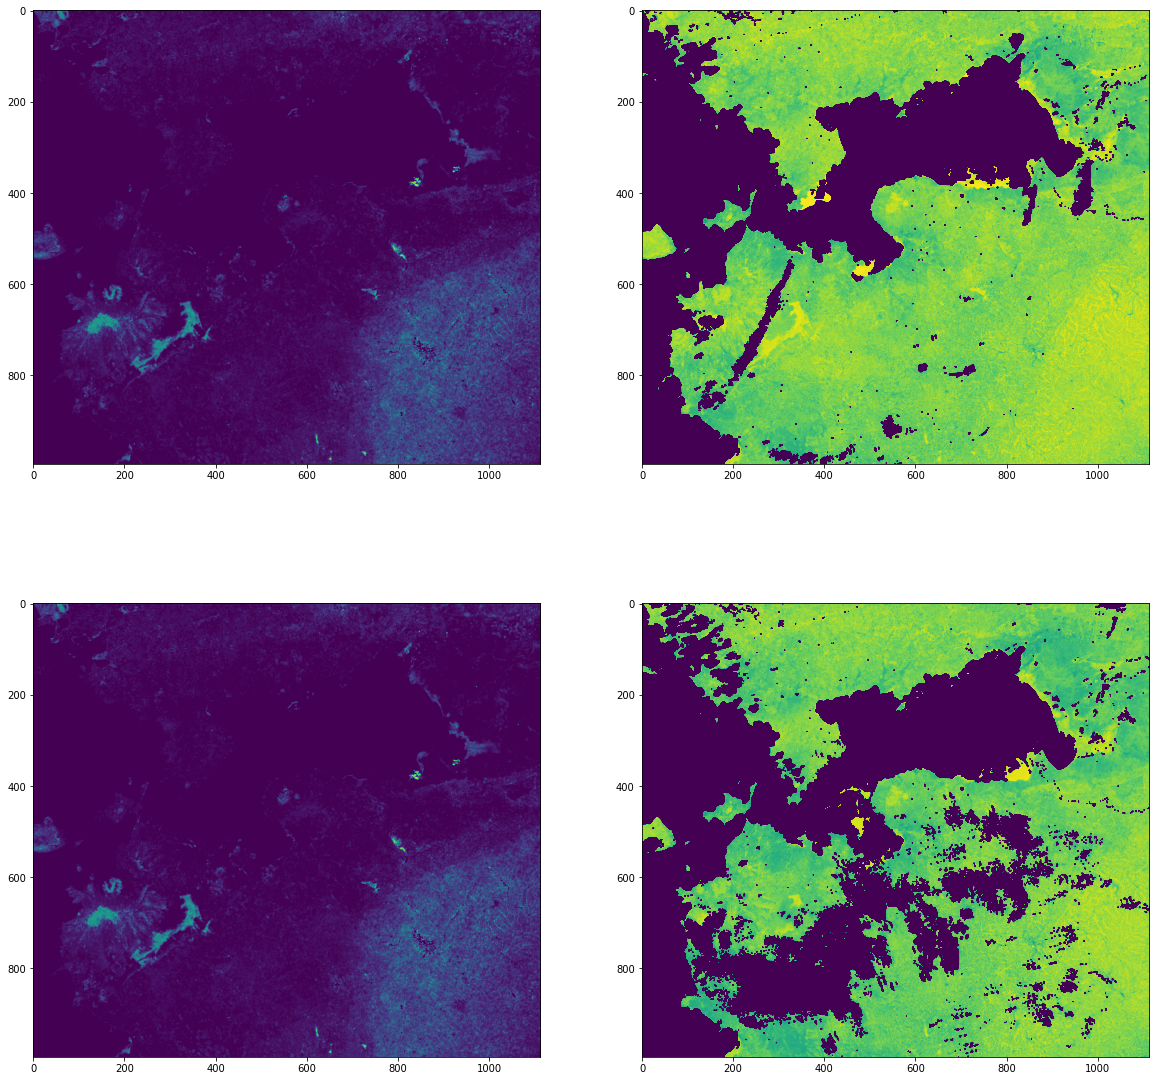

In [24]:
import matplotlib.pyplot as plt

_, axes = plt.subplots( nrows=2, ncols=2, figsize=(20,20) )

axes[ 0 ][ 0 ].imshow( response._df.iloc[ 0 ][ 'AGB.tif'] )
axes[ 0 ][ 1 ].imshow( response._df.iloc[ 0 ][ 'NDVI.tif'], vmin=-1.0 )
axes[ 1 ][ 0 ].imshow( response._df.iloc[ 1 ][ 'AGB.tif'] )
axes[ 1 ][ 1 ].imshow( response._df.iloc[ 1 ][ 'NDVI.tif'], vmin=-1.0 )